# Modulation Classification

Developing AutoML Model for AWGN Channel for Modulation Classification. SNR Ratio's(in dB) of Channel are $[−15,−10,−5,0,5,10,15,20,25,30]$.

**Data Generation:**
Data is generated using MatLab's Communication Toolbox for Modulation Schemes QPSK, 16-QAM, 64-QAM for SNR Ratio's (in dB) $[−15,−10,−5,0,5,10,15,20,25,30]$ when signal is transmitted through Channels Rician Channels.

**Modulation Classification:**
We will use AutoML to create a Classifier to Predict Labels.

## Imports

### Importing Libraries

We will be using AutoKeras for generating AutoML Models.
Source of Documentation: [https://autokeras.com/](https://autokeras.com/)

### Importing Data

Files are uploaded in Google Drive. Notebook is connected to Google Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Modulation-Classification/Real\ Dataset/AutoML

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Modulation-Classification/Real Dataset/AutoML


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import seaborn as sns
import scipy.io
import os
from sklearn.model_selection import train_test_split

# Importing Preprocessing Libraries
from Import_Functions import ImportData, ImportDatasets, SplitData
from Plot_Results import EvaluateData, PlotResults

# AutoML Libraries
!pip3 install autokeras
import autokeras as ak

# Tensorflow Libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, ReLU, Conv2D, Input, MaxPooling2D, BatchNormalization, AveragePooling2D
from tensorflow.keras.models import Model

## Customised AutoML Blocks

ReshapeLayerBlock: Removes Dimension in axis=1

In [3]:
class ReshapeLayerBlock(ak.Block):
    def build(self, hp, inputs=None):
        input_node = inputs[0]
        output_node = tf.squeeze(input_node,axis=1)
        return output_node

Callbacks

In [4]:
EarlyStoppingCallbacks = [tf.keras.callbacks.EarlyStopping(patience=3)]

## Importing Data

In [5]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('Rician')
X_Train, y_Train, X_Valid, y_Valid = SplitData(X_Train, y_Train, X_Valid, y_Valid, test_size=1/11)

## AutoML CNN Model for Rician Channel

For Rician Channel, Input Dimensions is (1,1024,2)

### Creating Classifier

In [6]:
tf.keras.backend.clear_session()

input_node = ak.ImageInput()
conv_node = ak.ConvBlock()(input_node)
dense_node = ak.DenseBlock()(conv_node)
output_node = ak.ClassificationHead(num_classes=3,
                                    loss='categorical_crossentropy')(dense_node)

RicianClassifier = ak.AutoModel(inputs=input_node,
                                outputs=output_node,
                                overwrite=True,
                                tuner='greedy',
                                max_trials=5)

RicianClassifier.fit(X_Train, y_Train, epochs=10, batch_size=4096, validation_split=0.3,shuffle=True,callbacks=EarlyStoppingCallbacks)

Trial 5 Complete [00h 04m 25s]
val_loss: 1.094277262687683

Best val_loss So Far: 0.756805956363678
Total elapsed time: 00h 10m 05s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
15/15 [==============================] - 13s 782ms/step - loss: 1.0987 - accuracy: 0.3288
Epoch 2/10
15/15 [==============================] - 9s 628ms/step - loss: 1.0986 - accuracy: 0.3348
Epoch 3/10
15/15 [==============================] - 9s 631ms/step - loss: 1.0986 - accuracy: 0.3343
Epoch 4/10
15/15 [==============================] - 9s 629ms/step - loss: 1.0978 - accuracy: 0.3481
Epoch 5/10
15/15 [==============================] - 9s 627ms/step - loss: 1.0848 - accuracy: 0.3945
Epoch 6/10
15/15 [==============================] - 9s 625ms/step - loss: 1.0486 - accuracy: 0.4343
Epoch 7/10
15/15 [==============================] - 9s 625ms/step - loss: 0.9898 - accuracy: 0.4556
Epoch 8/10
15/15 [==============================] - 9s 625ms/step - loss: 0.9735 - accuracy: 0.4575
Epoch 9/10
15/15 [===========

Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1024, 2)]      0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 1, 1024, 2)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1024, 32)       1632      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1024, 32)       25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 256, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 256, 32)        25632     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 256, 32)        25632 

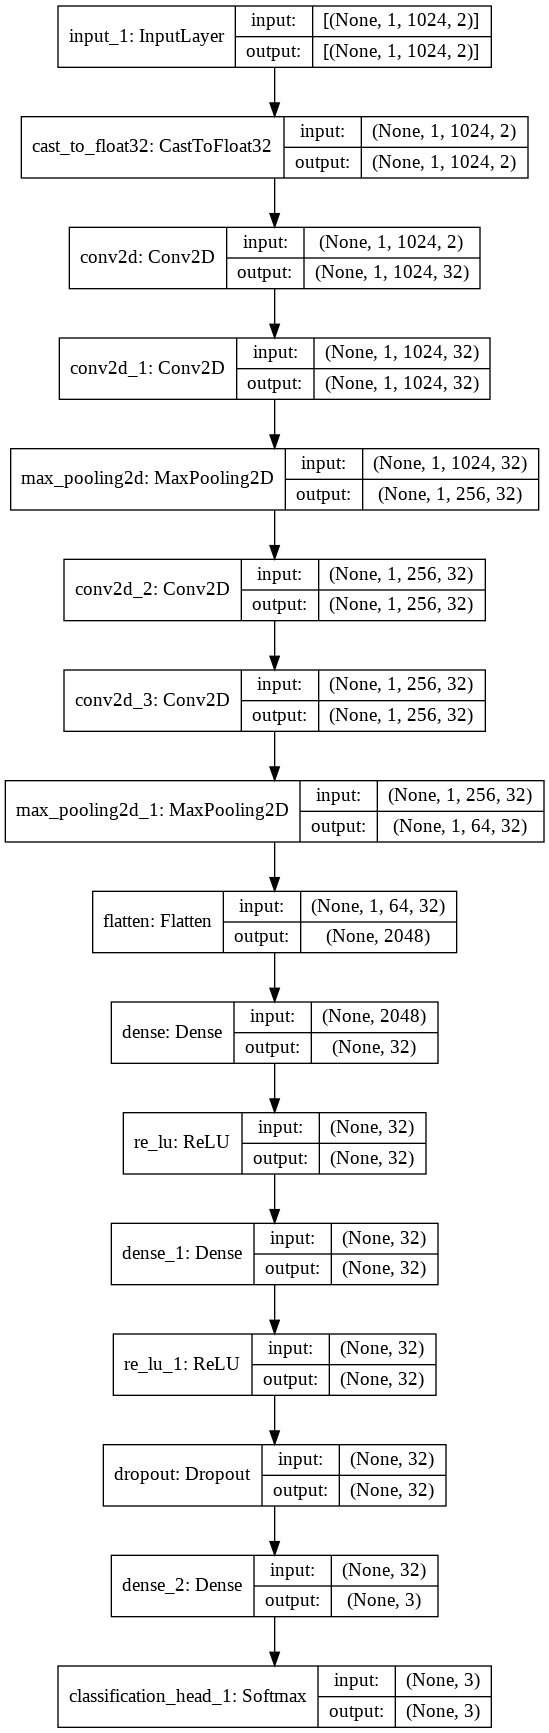

In [7]:
Rician_Model = RicianClassifier.export_model()
tf.keras.backend.clear_session()
Rician_Model.summary()
tf.keras.utils.plot_model(Rician_Model, to_file='../Models/Rician_Model_CNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [8]:
Rician_Model.fit(X_Train, y_Train, epochs=75, batch_size=4096, validation_split=0.1,shuffle=True)

Epoch 1/75
14/14 [==============================] - 11s 729ms/step - loss: 1.0842 - accuracy: 0.4207 - val_loss: 0.8225 - val_accuracy: 0.5720
Epoch 2/75
14/14 [==============================] - 6s 460ms/step - loss: 0.9994 - accuracy: 0.4525 - val_loss: 0.7711 - val_accuracy: 0.6668
Epoch 3/75
14/14 [==============================] - 6s 459ms/step - loss: 0.9642 - accuracy: 0.4726 - val_loss: 0.6765 - val_accuracy: 0.6605
Epoch 4/75
14/14 [==============================] - 6s 458ms/step - loss: 0.9385 - accuracy: 0.4714 - val_loss: 0.6531 - val_accuracy: 0.6390
Epoch 5/75
14/14 [==============================] - 6s 456ms/step - loss: 0.9315 - accuracy: 0.4753 - val_loss: 0.6340 - val_accuracy: 0.6643
Epoch 6/75
14/14 [==============================] - 6s 455ms/step - loss: 0.9276 - accuracy: 0.4825 - val_loss: 0.6306 - val_accuracy: 0.6688
Epoch 7/75
14/14 [==============================] - 6s 454ms/step - loss: 0.9237 - accuracy: 0.4844 - val_loss: 0.6238 - val_accuracy: 0.6715
Epoch

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.3233333230018616
SNR: -10 Accuracy: 0.3266666531562805
SNR: -5 Accuracy: 0.32499998807907104
SNR: 0 Accuracy: 0.3883333206176758
SNR: 5 Accuracy: 0.503333330154419
SNR: 10 Accuracy: 0.6449999809265137
SNR: 15 Accuracy: 0.6783333420753479
SNR: 20 Accuracy: 0.6933333277702332
SNR: 25 Accuracy: 0.7183333039283752
SNR: 30 Accuracy: 0.7099999785423279


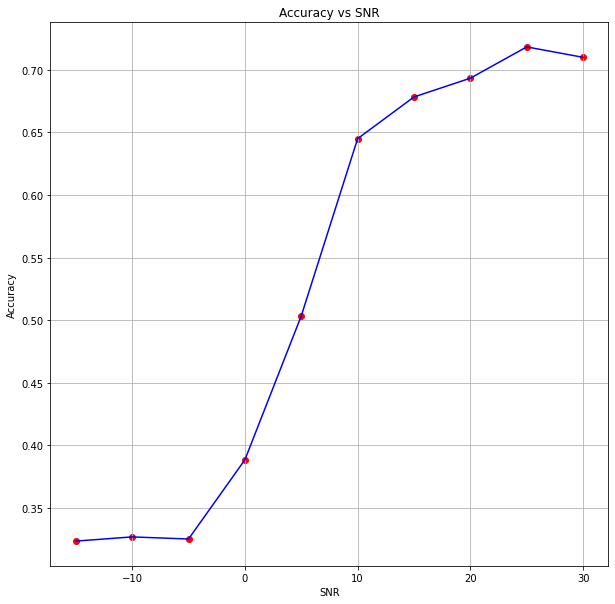

In [9]:
EvaluateData(Rician_Model, X_Valid, y_Valid, "../Results/Rician_Accuracy_CNN.jpg")

Save Model

In [10]:
Rician_Model.save("../Models/Rician_CNN.h5")

## AutoML RNN Model for Rician Channel

For Rician Channel, Input Dimensions is (1,1024,2)

### Creating Classifier

In [11]:
tf.keras.backend.clear_session()

input_node = ak.ImageInput()
reshape_node = ReshapeLayerBlock()(input_node)
rnn_node = ak.RNNBlock(return_sequences=True,
                       bidirectional=True,
                       layer_type='lstm')(reshape_node)
dense_node = ak.DenseBlock()(rnn_node)
output_node = ak.ClassificationHead(num_classes=3,
                                    loss='categorical_crossentropy')(dense_node)

RicianClassifier = ak.AutoModel(inputs=input_node,
                                outputs=output_node,
                                overwrite=True,
                                tuner='greedy',
                                max_trials=5)

RicianClassifier.fit(X_Train, y_Train, epochs=10, batch_size=4096, validation_split=0.3,shuffle=True,callbacks=EarlyStoppingCallbacks)

Trial 5 Complete [00h 00m 57s]
val_loss: 1.0980315208435059

Best val_loss So Far: 1.0972238779067993
Total elapsed time: 00h 04m 36s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
15/15 [==============================] - 12s 444ms/step - loss: 1.1046 - accuracy: 0.3310
Epoch 2/10
15/15 [==============================] - 7s 442ms/step - loss: 1.0986 - accuracy: 0.3390
Epoch 3/10
15/15 [==============================] - 7s 439ms/step - loss: 1.0972 - accuracy: 0.3480
Epoch 4/10
15/15 [==============================] - 7s 442ms/step - loss: 1.0956 - accuracy: 0.3579
Epoch 5/10
15/15 [==============================] - 7s 437ms/step - loss: 1.0938 - accuracy: 0.3636
Epoch 6/10
15/15 [==============================] - 7s 440ms/step - loss: 1.0912 - accuracy: 0.3751
Epoch 7/10
15/15 [==============================] - 7s 444ms/step - loss: 1.0896 - accuracy: 0.3786
Epoch 8/10
15/15 [==============================] - 7s 440ms/step - loss: 1.0878 - accuracy: 0.3814
Epoch 9/10
15/15 [=========

INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1024, 2)]      0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 1, 1024, 2)        0         
_________________________________________________________________
tf.compat.v1.squeeze (TFOpLa (None, 1024, 2)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 1024, 4)           80        
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1024, 4)           112       
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                131104

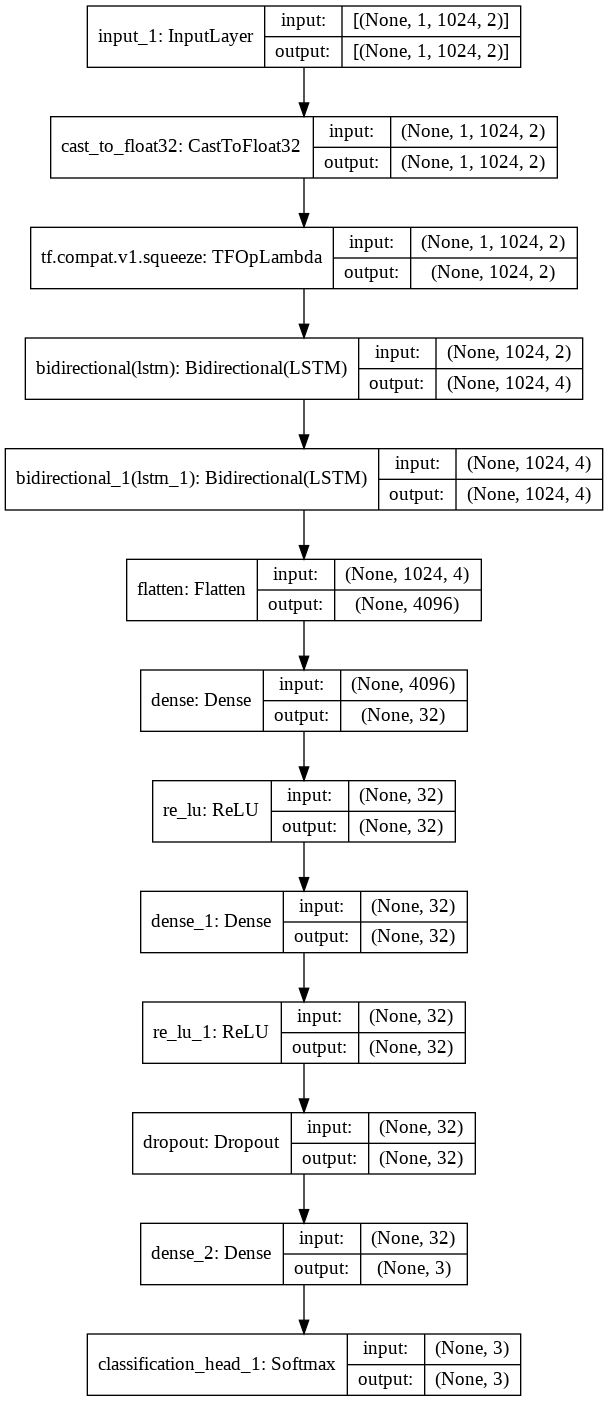

In [12]:
Rician_Model = RicianClassifier.export_model()
Rician_Model.summary()
tf.keras.backend.clear_session()
tf.keras.utils.plot_model(Rician_Model, to_file='../Models/Rician_Model_RNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [13]:
Rician_Model.fit(X_Train, y_Train, epochs=75, batch_size=4096, validation_split=0.1,shuffle=True)

Epoch 1/75
14/14 [==============================] - 11s 381ms/step - loss: 1.0871 - accuracy: 0.3831 - val_loss: 1.0729 - val_accuracy: 0.4210
Epoch 2/75
14/14 [==============================] - 4s 278ms/step - loss: 1.0843 - accuracy: 0.3894 - val_loss: 1.0797 - val_accuracy: 0.3952
Epoch 3/75
14/14 [==============================] - 4s 277ms/step - loss: 1.0800 - accuracy: 0.3978 - val_loss: 1.0822 - val_accuracy: 0.3940
Epoch 4/75
14/14 [==============================] - 4s 278ms/step - loss: 1.0762 - accuracy: 0.4037 - val_loss: 1.0849 - val_accuracy: 0.3857
Epoch 5/75
14/14 [==============================] - 4s 278ms/step - loss: 1.0727 - accuracy: 0.4096 - val_loss: 1.0875 - val_accuracy: 0.3863
Epoch 6/75
14/14 [==============================] - 4s 280ms/step - loss: 1.0686 - accuracy: 0.4150 - val_loss: 1.0898 - val_accuracy: 0.3788
Epoch 7/75
14/14 [==============================] - 4s 280ms/step - loss: 1.0642 - accuracy: 0.4216 - val_loss: 1.0906 - val_accuracy: 0.3803
Epoch

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.3700000047683716
SNR: -10 Accuracy: 0.3316666781902313
SNR: -5 Accuracy: 0.3499999940395355
SNR: 0 Accuracy: 0.3383333384990692
SNR: 5 Accuracy: 0.38333332538604736
SNR: 10 Accuracy: 0.32499998807907104
SNR: 15 Accuracy: 0.30666667222976685
SNR: 20 Accuracy: 0.3766666650772095
SNR: 25 Accuracy: 0.33500000834465027
SNR: 30 Accuracy: 0.2933333218097687


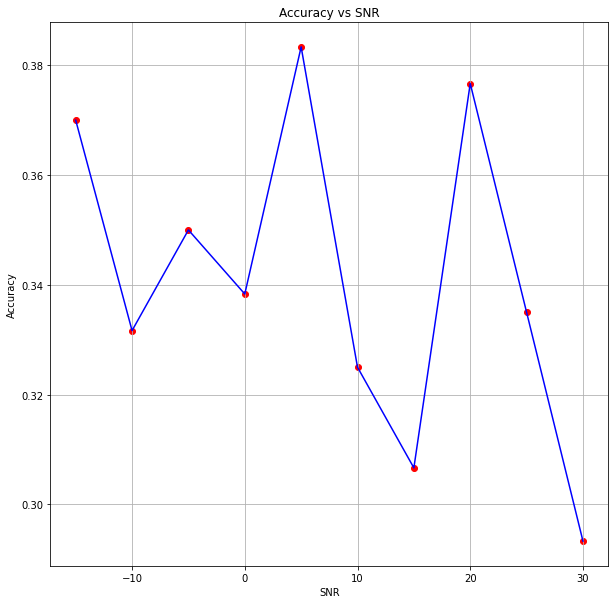

In [14]:
EvaluateData(Rician_Model, X_Valid, y_Valid, "../Results/Rician_Accuracy_RNN.jpg")

Save Model

In [15]:
Rician_Model.save("../Models/Rician_RNN.h5")

## AutoML CLDNN Model for Rician Channel

For Rician Channel, Input Dimensions is (1,1024,2)

### Creating Classifier

In [16]:
tf.keras.backend.clear_session()

input_node = ak.ImageInput()
conv_node = ak.ConvBlock()(input_node)
reshape_node = ReshapeLayerBlock()(conv_node)
rnn_node = ak.RNNBlock(return_sequences=True,
                       bidirectional=True,
                       layer_type='lstm')(reshape_node)
dense_node = ak.DenseBlock()(rnn_node)
output_node = ak.ClassificationHead(num_classes=3,
                                    loss='categorical_crossentropy')(dense_node)

RicianClassifier = ak.AutoModel(inputs=input_node,
                                outputs=output_node,
                                overwrite=True,
                                tuner='greedy',
                                max_trials=1)

RicianClassifier.fit(X_Train, y_Train, epochs=10, batch_size=4096, validation_split=0.3,shuffle=True,callbacks=EarlyStoppingCallbacks)

Trial 1 Complete [00h 02m 02s]
val_loss: 1.0315735340118408

Best val_loss So Far: 1.0315735340118408
Total elapsed time: 00h 02m 02s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/10
15/15 [==============================] - 16s 706ms/step - loss: 1.0987 - accuracy: 0.3299
Epoch 2/10
15/15 [==============================] - 11s 707ms/step - loss: 1.0986 - accuracy: 0.3335
Epoch 3/10
15/15 [==============================] - 11s 707ms/step - loss: 1.0986 - accuracy: 0.3307
Epoch 4/10
15/15 [==============================] - 11s 704ms/step - loss: 1.0986 - accuracy: 0.3416
Epoch 5/10
15/15 [==============================] - 10s 700ms/step - loss: 1.0981 - accuracy: 0.3431
Epoch 6/10
15/15 [==============================] - 10s 696ms/step - loss: 1.0895 - accuracy: 0.3897
Epoch 7/10
15/15 [==============================] - 10s 696ms/step - loss: 1.0754 - accuracy: 0.4222
Epoch 8/10
15/15 [==============================] - 10s 700ms/step - loss: 1.0143 - accuracy: 0.4305
Epoch 9/10
15/15 [==============================] - 10s 699ms/step - loss: 1.1080 - accuracy: 0.3353
Epoch 10/10
15/15 [==============================] - 10s 699ms/step - loss: 1.0829 - accura

INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1024, 2)]      0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 1, 1024, 2)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1024, 32)       1632      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1024, 32)       25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 256, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 256, 32)        25632     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 256, 32)        25632 

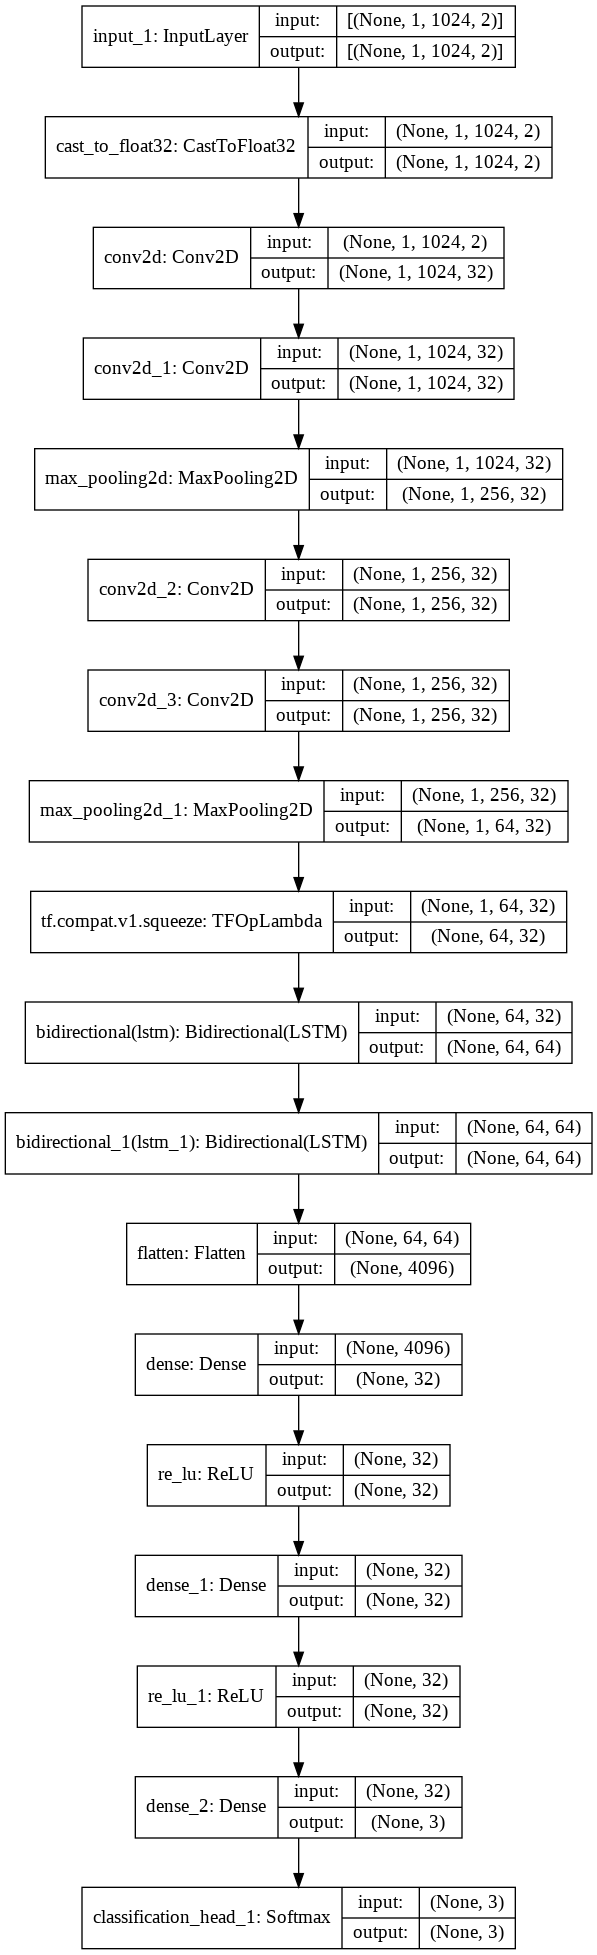

In [17]:
Rician_Model = RicianClassifier.export_model()
Rician_Model.summary()
tf.keras.backend.clear_session()
tf.keras.utils.plot_model(Rician_Model, to_file='../Models/Rician_Model_CLDNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [18]:
Rician_Model.fit(X_Train, y_Train, epochs=75, batch_size=4096, validation_split=0.1,shuffle=True)

Epoch 1/75
14/14 [==============================] - 14s 624ms/step - loss: 1.0754 - accuracy: 0.3744 - val_loss: 0.9015 - val_accuracy: 0.6227
Epoch 2/75
14/14 [==============================] - 7s 535ms/step - loss: 0.9722 - accuracy: 0.4577 - val_loss: 0.7645 - val_accuracy: 0.6030
Epoch 3/75
14/14 [==============================] - 8s 544ms/step - loss: 0.9319 - accuracy: 0.4706 - val_loss: 0.6317 - val_accuracy: 0.6687
Epoch 4/75
14/14 [==============================] - 8s 548ms/step - loss: 0.9094 - accuracy: 0.4865 - val_loss: 0.6301 - val_accuracy: 0.6648
Epoch 5/75
14/14 [==============================] - 8s 544ms/step - loss: 0.8976 - accuracy: 0.4931 - val_loss: 0.6244 - val_accuracy: 0.6568
Epoch 6/75
14/14 [==============================] - 8s 536ms/step - loss: 0.8857 - accuracy: 0.4922 - val_loss: 0.6235 - val_accuracy: 0.6378
Epoch 7/75
14/14 [==============================] - 7s 533ms/step - loss: 0.8750 - accuracy: 0.4925 - val_loss: 0.5973 - val_accuracy: 0.6720
Epoch

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.34166666865348816
SNR: -10 Accuracy: 0.3383333384990692
SNR: -5 Accuracy: 0.3683333396911621
SNR: 0 Accuracy: 0.4000000059604645
SNR: 5 Accuracy: 0.47333332896232605
SNR: 10 Accuracy: 0.596666693687439
SNR: 15 Accuracy: 0.6933333277702332
SNR: 20 Accuracy: 0.7816666960716248
SNR: 25 Accuracy: 0.7933333516120911
SNR: 30 Accuracy: 0.8433333039283752


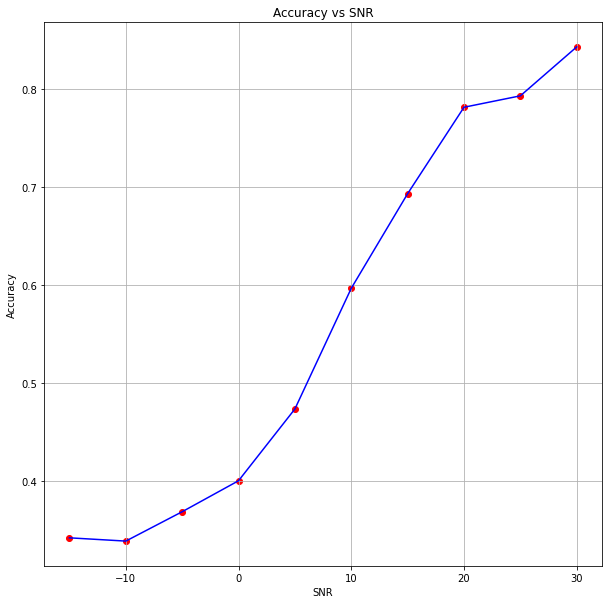

In [19]:
EvaluateData(Rician_Model, X_Valid, y_Valid, "../Results/Rician_Accuracy_CLDNN.jpg")

Save Model

In [20]:
Rician_Model.save("../Models/Rician_CLDNN.h5")

## CNN Model for Rician Channel
For Rician Channel, Input Dimensions is (1,1024,2)

### Creating Classifier

In [21]:
tf.keras.backend.clear_session()

Inp = Input(shape=(1,1024,2))

x = Conv2D(filters=16, kernel_size=(1,8),padding='same')(Inp)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(1,2),strides=(1,2))(x)

x = Conv2D(filters=24, kernel_size=(1,8),padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(1,2),strides=(1,2))(x)

x = Conv2D(filters=32, kernel_size=(1,8),padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(1,2),strides=(1,2))(x)

x = Conv2D(filters=48, kernel_size=(1,8),padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(1,2),strides=(1,2))(x)

x = Conv2D(filters=64, kernel_size=(1,8),padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(1,2),strides=(1,2))(x)

x = Conv2D(filters=96, kernel_size=(1,8),padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = AveragePooling2D(pool_size=(1,32))(x)

x = Flatten()(x)
Out = Dense(3,activation='softmax')(x)

CNNModel = Model(Inp,Out)

Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1024, 2)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1024, 16)       272       
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 1024, 16)       64        
_________________________________________________________________
re_lu (ReLU)                 (None, 1, 1024, 16)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 512, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 512, 24)        3096      
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512, 24)        96    

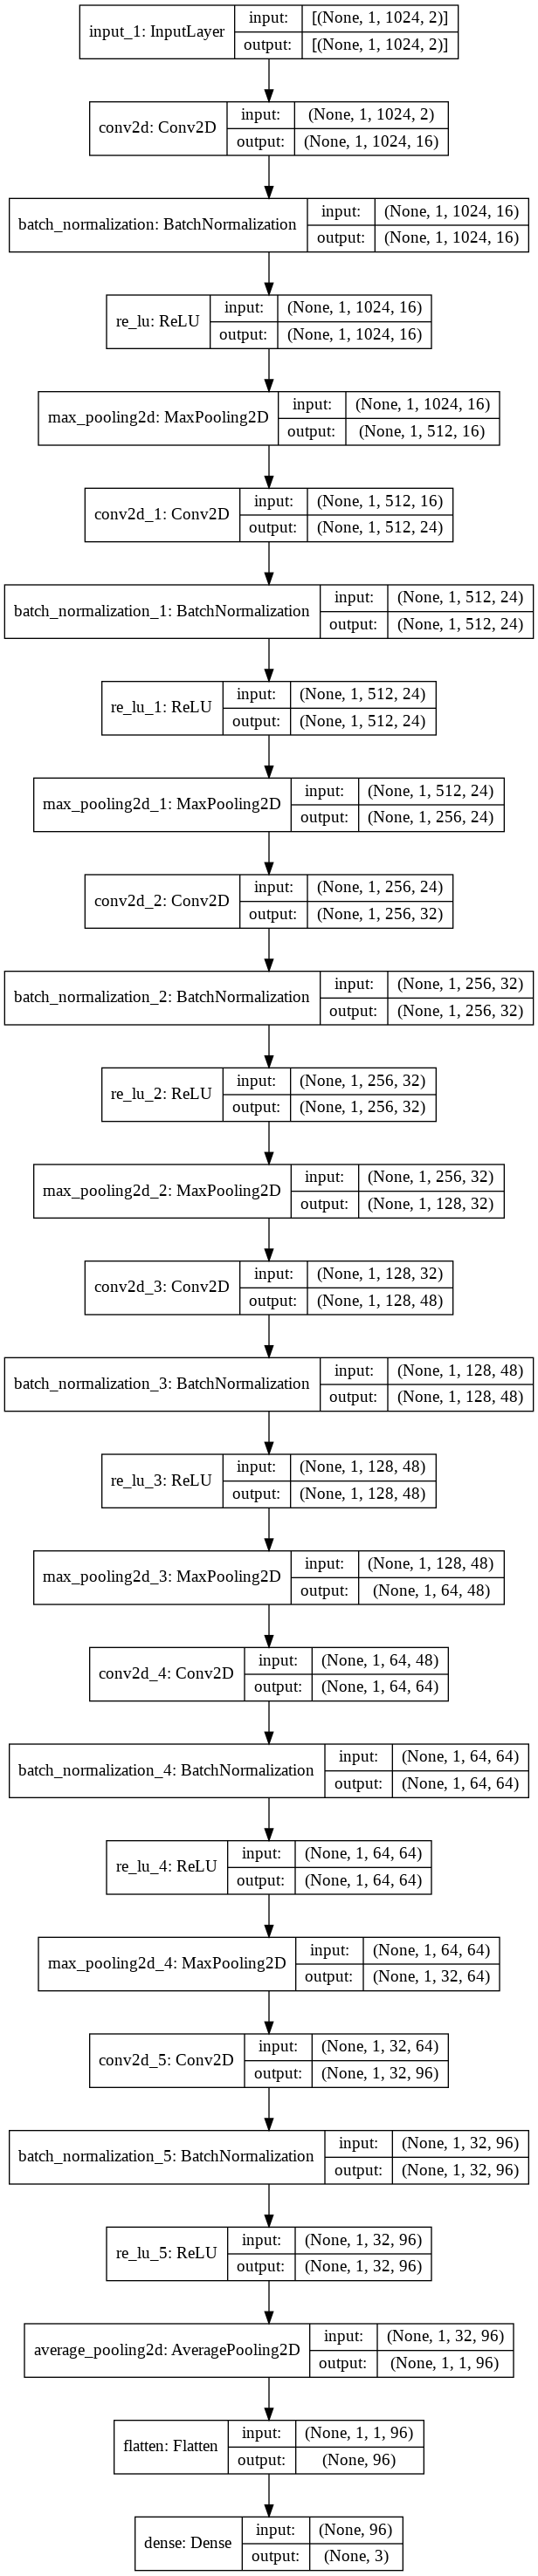

In [22]:
CNNModel.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002),loss='categorical_crossentropy', metrics=['accuracy'])
CNNModel.summary()
tf.keras.utils.plot_model(CNNModel, to_file='../Models/CNN_Rician_Model.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [23]:
CNNModel.fit(X_Train,y_Train,batch_size=256,epochs=50,validation_split=0.1,shuffle=True)

Epoch 1/50
211/211 [==============================] - 6s 22ms/step - loss: 1.1526 - accuracy: 0.3393 - val_loss: 1.1104 - val_accuracy: 0.3472
Epoch 2/50
211/211 [==============================] - 3s 16ms/step - loss: 1.0960 - accuracy: 0.3655 - val_loss: 1.0642 - val_accuracy: 0.4733
Epoch 3/50
211/211 [==============================] - 3s 16ms/step - loss: 1.0878 - accuracy: 0.3834 - val_loss: 1.0279 - val_accuracy: 0.5182
Epoch 4/50
211/211 [==============================] - 3s 16ms/step - loss: 1.0751 - accuracy: 0.4047 - val_loss: 0.9714 - val_accuracy: 0.5650
Epoch 5/50
211/211 [==============================] - 3s 16ms/step - loss: 1.0557 - accuracy: 0.4222 - val_loss: 0.8836 - val_accuracy: 0.5925
Epoch 6/50
211/211 [==============================] - 3s 16ms/step - loss: 1.0254 - accuracy: 0.4373 - val_loss: 0.7809 - val_accuracy: 0.6153
Epoch 7/50
211/211 [==============================] - 3s 16ms/step - loss: 0.9922 - accuracy: 0.4505 - val_loss: 0.7000 - val_accuracy: 0.6328

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.351666659116745
SNR: -10 Accuracy: 0.3466666638851166
SNR: -5 Accuracy: 0.33500000834465027
SNR: 0 Accuracy: 0.3633333444595337
SNR: 5 Accuracy: 0.4983333349227905
SNR: 10 Accuracy: 0.6349999904632568
SNR: 15 Accuracy: 0.6833333373069763
SNR: 20 Accuracy: 0.699999988079071
SNR: 25 Accuracy: 0.6783333420753479
SNR: 30 Accuracy: 0.7350000143051147


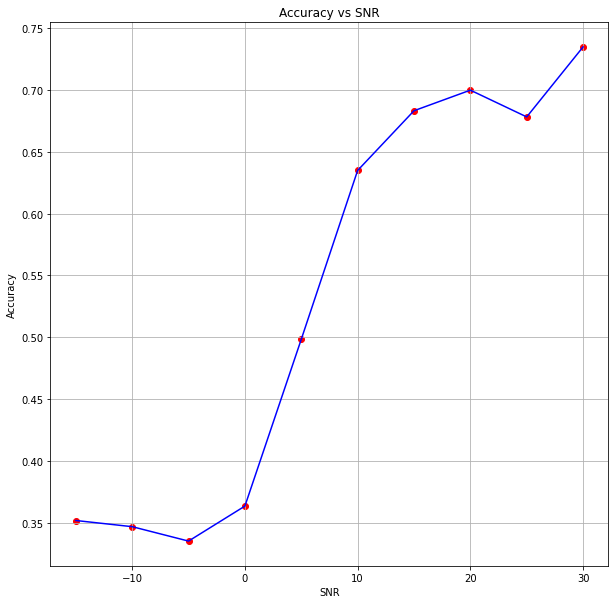

In [24]:
EvaluateData(CNNModel, X_Valid, y_Valid, "../Results/CNN_Rician_Accuracy.jpg")

Save Model

In [25]:
CNNModel.save("../Models/CNN_Rician.h5")

## Plot Results


### Rician Model

Importing Data and Models

In [26]:
Rician_CNN = tf.keras.models.load_model("../Models/Rician_CNN.h5")
Rician_RNN = tf.keras.models.load_model("../Models/Rician_RNN.h5")
Rician_CLDNN = tf.keras.models.load_model("../Models/Rician_CLDNN.h5")
CNN_Rician = tf.keras.models.load_model("../Models/CNN_Rician.h5")

Plotting Results

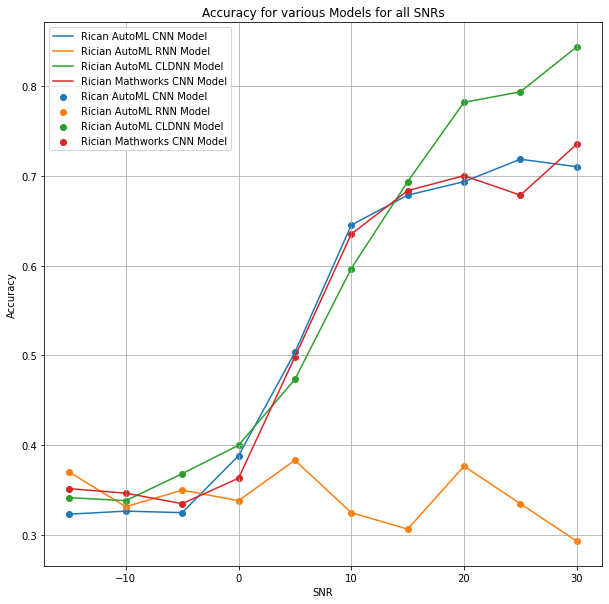

In [27]:
Models = {"Rican AutoML CNN Model":Rician_CNN, "Rician AutoML RNN Model":Rician_RNN, "Rician AutoML CLDNN Model":Rician_CLDNN, "Rician Mathworks CNN Model":CNN_Rician}
PlotResults(Models, X_Valid, y_Valid, "../Results/Rician_Accuracies.jpg")